## Final Project Submission

Please fill out:
* Student name: Namita Rana
* Student pace: Full time
* Scheduled project review date/time: December 10th @ 2:30 PM PST
* Instructor name: Mark Barbour
* Blog post URL:https://medium.com/@namitarana


# Movie Industry Analysis for Microsoft

This proposal contains an analysis of various movie data in order to inform executive decision making regarding Microsoft's movie studio who is just about to venture into the movie making business. Specifically, it provides actionable insights with respect to what types of films the studio should focus on creating with the goal of maximizing box office performance. 
Initial descriptive analysis of box office performance and other movie data shows that box office earnings are related to genre, runtime,rating,release month of the movie and the language preferred by its target audience.

# Business Problem:
Microsoft is interested in developing original video content to remain competitive in the tech world by creating a movie studio. This project will examine the movie industry to provide a set of recommendations on where to get started. 

**Several data sets have been explored, but the following are included in the results**:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/) 
* [TheMovieDB](https://www.themoviedb.org/)

**Let's import the required libraries:**

# Questions Our Data Can Answer
* Which Genres are gathering the highest worldwide gross?
* Which languages have generated the maximum reneue: domestically & worldwide?
* Does release month of a movie matter?
* Does votes for a movie count? How does an average_voted movie perform at Box Office?

In [260]:
#importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Collecting Data:


##  Importing all the dataset we will be using for this project:
### Box Office Mojo:
This dataframe could be useful in determining which movie generated the highest gross earnings and for which year.
It can also help us in understanding which studio is producing the movie's with highest gross earnings.
### Imdb Data:
For this analysis imdb.title.basics is used which provides data about runtime,genre,original title.
### Tmdb Data:
This data can provide us with great insight about which language is the most preferred one by audiences and which language movie has the most voter_count.


In [261]:
#Import all data files
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
tmdb_data = pd.read_csv('zippedData/tmdb.movies.csv.gz')


In [262]:
#bom_movie information
bom_movie_gross.info()
bom_movie_gross.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [263]:
#imdb_basics information
imdb_title_basics.info()
imdb_title_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [264]:
#tmdb data information
tmdb_data.info()
tmdb_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#  Primary Interest
Our primary interest lies in finding the factors that contribute to high Domestic and worldwide gross I will limit the scope of my analysis to five factors.
* Genre
* Runtime
* Language
* Average_vote count
* Release Month


# Data Preparation:
My goal for this step is to merge the datasets into a final datset which I will be using for analysis of the the factors that can help Microsoft in taking the business decisions before investing in the movie industry.

### We will start with cleaning the first dataset bom_movie_gross and get it ready to merge:

In [265]:
# Convert domestic gross value data type to int
#bom_movie_gross['domestic_gross'] = bom_movie_gross['domestic_gross'].fillna(0)
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(',','')
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].astype('float64')

In [266]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [267]:
#Replacing the null values in foreign gross with 0:
#as it may have not been released worlwide
bom_movie_gross['foreign_gross'].fillna(0, inplace=True)
bom_movie_gross['domestic_gross'].fillna(0,inplace=True)

In [268]:
display(bom_movie_gross.info())
bom_movie_gross

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


None

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


### Preparing the imdb dataset:
We will be splitting the Imdb datset column genres into discrete genre columns.

In [269]:
#We will separate the genres column into discrete columns:
imdb_title_basics[['genre_1','genre_2','genre_3']] = imdb_title_basics['genres'].str.split(',',n = -1,expand= True)
imdb_title_basics.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Comedy,None,None
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Horror,Thriller,None
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",Documentary,History,None
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,Biography,None,None


In [270]:
#Drop the genres and tconst column:

imdb_title_basics.isna().sum()
imdb_title_basics.rename(columns={'primary_title': 'title'}, inplace=True)
imdb_title_basics

,tconst,title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Drama,None,None
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Documentary,None,None
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Comedy,None,None
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN


## Feature engineering:
Merge the imdb & bom movie gross datasets.
    

In [271]:
#Merged data set of bom_movie_gross & imdb_title_basics
imdb_bom_dataset = pd.merge(imdb_title_basics, bom_movie_gross, on='title', how='inner')
imdb_bom_dataset

,tconst,title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Action,Crime,Drama,Relbig.,1100000.0,0.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",Adventure,Drama,Romance,IFC,744000.0,8000000.0,2012
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,Drama,None,None,IFC,744000.0,8000000.0,2012
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,Documentary,None,None,IFC,744000.0,8000000.0,2012
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,Drama,None,None,IFC,744000.0,8000000.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,Romance,None,None,WGUSA,747000.0,82100000.0,2018
3362,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,Drama,None,None,Eros,72000.0,0.0,2018
3363,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Comedy,Horror,None,Strand,10800.0,150000.0,2010
3364,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",Drama,Romance,None,CL,181000.0,0.0,2018


### Preparing tmdb dataset
Dropping the genre_ids and orginial column as it doesn't add any value to the data:



In [272]:
#Dropping the genre_ids:
tmdb_data.drop(columns =['genre_ids','id'], axis = 1,inplace = True)
tmdb_data

,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,26512,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### Preparing the final dataset:
**After merging and cleaning the 2 datasets now I mergerd the imdb_bom_dataset with tmdb_data.**
**This final_movie_dataset will be used for the analysis**.

In [273]:
#Our final dataset
final_movie_dataset = pd.merge( tmdb_data,imdb_bom_dataset)
final_movie_dataset

,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3,studio,domestic_gross,foreign_gross,year
0,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,2010,98.0,"Action,Adventure,Animation",Action,Adventure,Animation,P/DW,217600000.0,277300000.0,2010
1,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,2010,124.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Par.,312400000.0,311500000.0,2010
2,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186,tt1375666,2010,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,WB,292600000.0,535700000.0,2010
3,7,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,tt0435761,2010,103.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,BV,415000000.0,652000000.0,2010
4,8,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,tt1323594,2010,95.0,"Animation,Comedy,Family",Animation,Comedy,Family,Uni.,251500000.0,291600000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,24778,sv,Unga Astrid,4.734,2018-11-23,Becoming Astrid,7.4,28,tt6433456,2018,123.0,"Biography,Drama",Biography,Drama,None,MBox,120000.0,0.0,2018
3194,24916,it,"Nico, 1988",3.789,2018-07-04,"Nico, 1988",7.3,40,tt7186092,2017,93.0,"Biography,Drama,Music",Biography,Drama,Music,Magn.,73300.0,0.0,2018
3195,25037,en,Maria by Callas,3.184,2018-11-02,Maria by Callas,7.6,11,tt7364566,2017,119.0,"Biography,Documentary,Music",Biography,Documentary,Music,SPC,1300000.0,0.0,2018
3196,25148,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,tt3576728,2015,105.0,"Action,Adventure,Animation",Action,Adventure,Animation,VE,491000.0,1700000.0,2018


In [274]:
#Splitting the final_movie_dataset column release_month into 'year','Month',Date
final_movie_dataset[['year','Month','Date']] = final_movie_dataset['release_date'].str.split('-',n = -1,expand= True)
final_movie_dataset

,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,start_year,...,genres,genre_1,genre_2,genre_3,studio,domestic_gross,foreign_gross,year,Month,Date
0,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,2010,...,"Action,Adventure,Animation",Action,Adventure,Animation,P/DW,217600000.0,277300000.0,2010,03,26
1,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,2010,...,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Par.,312400000.0,311500000.0,2010,05,07
2,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186,tt1375666,2010,...,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,WB,292600000.0,535700000.0,2010,07,16
3,7,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,tt0435761,2010,...,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,BV,415000000.0,652000000.0,2010,06,17
4,8,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,tt1323594,2010,...,"Animation,Comedy,Family",Animation,Comedy,Family,Uni.,251500000.0,291600000.0,2010,07,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,24778,sv,Unga Astrid,4.734,2018-11-23,Becoming Astrid,7.4,28,tt6433456,2018,...,"Biography,Drama",Biography,Drama,None,MBox,120000.0,0.0,2018,11,23
3194,24916,it,"Nico, 1988",3.789,2018-07-04,"Nico, 1988",7.3,40,tt7186092,2017,...,"Biography,Drama,Music",Biography,Drama,Music,Magn.,73300.0,0.0,2018,07,04
3195,25037,en,Maria by Callas,3.184,2018-11-02,Maria by Callas,7.6,11,tt7364566,2017,...,"Biography,Documentary,Music",Biography,Documentary,Music,SPC,1300000.0,0.0,2018,11,02
3196,25148,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,tt3576728,2015,...,"Action,Adventure,Animation",Action,Adventure,Animation,VE,491000.0,1700000.0,2018,02,02


In [275]:
#Dropping columns: 'tconst', start_year
final_movie_dataset.drop(['tconst','start_year'],axis = 1,inplace = True)

In [276]:
#COnverting month value to respective month name:
import calendar
final_movie_dataset['Month'] = final_movie_dataset['Month'].astype(int)
final_movie_dataset['Month'] = final_movie_dataset['Month'].apply(lambda x: calendar.month_abbr[x])
final_movie_dataset


,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count,runtime_minutes,genres,genre_1,genre_2,genre_3,studio,domestic_gross,foreign_gross,year,Month,Date
0,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,98.0,"Action,Adventure,Animation",Action,Adventure,Animation,P/DW,217600000.0,277300000.0,2010,Mar,26
1,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,124.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Par.,312400000.0,311500000.0,2010,May,07
2,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,WB,292600000.0,535700000.0,2010,Jul,16
3,7,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,103.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,BV,415000000.0,652000000.0,2010,Jun,17
4,8,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,95.0,"Animation,Comedy,Family",Animation,Comedy,Family,Uni.,251500000.0,291600000.0,2010,Jul,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,24778,sv,Unga Astrid,4.734,2018-11-23,Becoming Astrid,7.4,28,123.0,"Biography,Drama",Biography,Drama,None,MBox,120000.0,0.0,2018,Nov,23
3194,24916,it,"Nico, 1988",3.789,2018-07-04,"Nico, 1988",7.3,40,93.0,"Biography,Drama,Music",Biography,Drama,Music,Magn.,73300.0,0.0,2018,Jul,04
3195,25037,en,Maria by Callas,3.184,2018-11-02,Maria by Callas,7.6,11,119.0,"Biography,Documentary,Music",Biography,Documentary,Music,SPC,1300000.0,0.0,2018,Nov,02
3196,25148,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,105.0,"Action,Adventure,Animation",Action,Adventure,Animation,VE,491000.0,1700000.0,2018,Feb,02



##  Calculating the total Worldwide Gross
Calculate the total worldwide gross by adding the values of domestic & foreign gross.

In [277]:
#calculate the total worldwide gross
final_movie_dataset['worldwide_gross'] = final_movie_dataset['domestic_gross'] + final_movie_dataset['foreign_gross']
final_movie_dataset['Average_gross'] = final_movie_dataset['worldwide_gross']/2
final_movie_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 0 to 3197
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3198 non-null   int64  
 1   original_language  3198 non-null   object 
 2   original_title     3198 non-null   object 
 3   popularity         3198 non-null   float64
 4   release_date       3198 non-null   object 
 5   title              3198 non-null   object 
 6   vote_average       3198 non-null   float64
 7   vote_count         3198 non-null   int64  
 8   runtime_minutes    3010 non-null   float64
 9   genres             3152 non-null   object 
 10  genre_1            3152 non-null   object 
 11  genre_2            2376 non-null   object 
 12  genre_3            1598 non-null   object 
 13  studio             3198 non-null   object 
 14  domestic_gross     3198 non-null   float64
 15  foreign_gross      3198 non-null   float64
 16  year               3198 


##  Merging Series to compute results.

In [278]:
#merging the worldwide gross,title, highest worldiwde gross:
final_movie_dataset.info()
final_movie_dataset1 = final_movie_dataset[['genres', 'title','worldwide_gross']]
final_movie_dataset1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 0 to 3197
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3198 non-null   int64  
 1   original_language  3198 non-null   object 
 2   original_title     3198 non-null   object 
 3   popularity         3198 non-null   float64
 4   release_date       3198 non-null   object 
 5   title              3198 non-null   object 
 6   vote_average       3198 non-null   float64
 7   vote_count         3198 non-null   int64  
 8   runtime_minutes    3010 non-null   float64
 9   genres             3152 non-null   object 
 10  genre_1            3152 non-null   object 
 11  genre_2            2376 non-null   object 
 12  genre_3            1598 non-null   object 
 13  studio             3198 non-null   object 
 14  domestic_gross     3198 non-null   float64
 15  foreign_gross      3198 non-null   float64
 16  year               3198 

,genres,title,worldwide_gross
0,"Action,Adventure,Animation",How to Train Your Dragon,4.949000e+08
1,"Action,Adventure,Sci-Fi",Iron Man 2,6.239000e+08
2,"Action,Adventure,Sci-Fi",Inception,8.283000e+08
3,"Adventure,Animation,Comedy",Toy Story 3,1.067000e+09
4,"Animation,Comedy,Family",Despicable Me,5.431000e+08
...,...,...,...
3193,"Biography,Drama",Becoming Astrid,1.200000e+05
3194,"Biography,Drama,Music","Nico, 1988",7.330000e+04
3195,"Biography,Documentary,Music",Maria by Callas,1.300000e+06
3196,"Action,Adventure,Animation",Bilal: A New Breed of Hero,2.191000e+06



###  Getting a list of all genres.

In [279]:
#Get a list of all the genres:
#By splitting each genre using ',' as the delimiter and stacking the rows ontop of each other.
final_movie_dataset2 = final_movie_dataset.set_index('title').genres.str.split(',', expand=True).stack().reset_index('title')
final_movie_dataset2.columns = ['title', 'genres']
final_movie_dataset2.head()

,title,genres
0,How to Train Your Dragon,Action
1,How to Train Your Dragon,Adventure
2,How to Train Your Dragon,Animation
0,Iron Man 2,Action
1,Iron Man 2,Adventure



##  Merging the 2 dataframes:
final_movie_dataset1 & final_movie_dataset2

In [280]:
Genre_popularity = pd.merge( final_movie_dataset1,final_movie_dataset2).drop_duplicates()
Genre_popularity

,genres,title,worldwide_gross
0,Comedy,Grown Ups,271400000.0
1,Documentary,Unstoppable,167800000.0
81,Horror,The Town,154000000.0
82,Comedy,Remember Me,56100000.0
84,Thriller,Remember Me,56100000.0
...,...,...,...
3471,Drama,The Bookshop,11500000.0
3472,Drama,The Children Act,17548000.0
3473,Horror,Beast,800000.0
3474,Comedy,An Actor Prepares,1700.0


# Generating Visualizations
### Genre generating the highest Worldwide Gross.

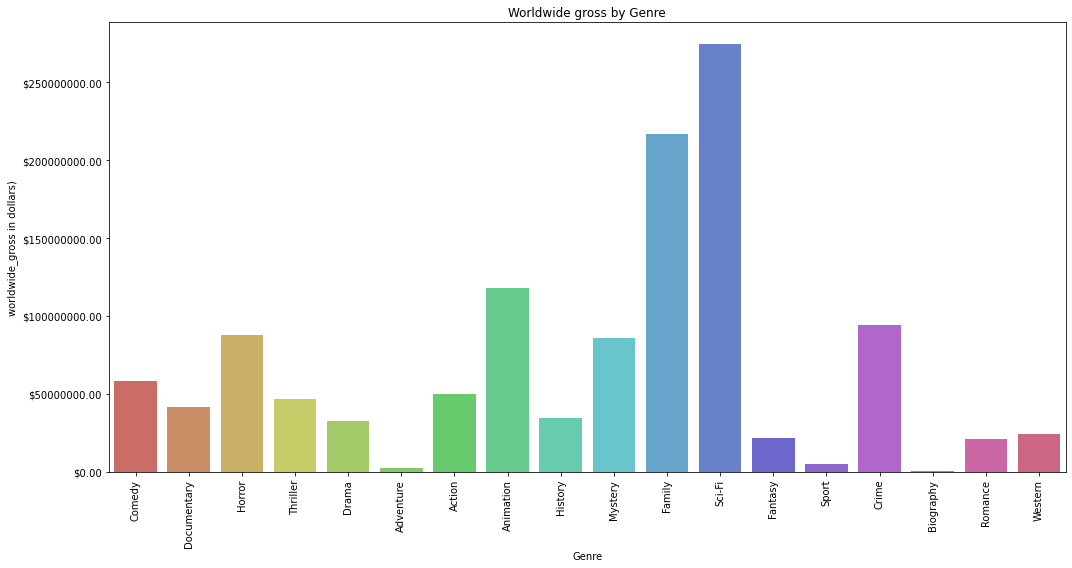

In [281]:
#Creating a bar plot to show which Genre is creating the highest worldwide gross
Genre_popularity_fig, Genre_popularity_ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.barplot(ax= Genre_popularity_ax, x='genres', y='worldwide_gross', data=Genre_popularity,ci = None,palette='hls')
Genre_popularity_ax.set_xlabel('Genre')
Genre_popularity_ax.set_ylabel('worldwide_gross in dollars)')
Genre_popularity_ax.set_title('Worldwide gross by Genre')
Genre_popularity_ax.yaxis.set_major_formatter('${x:1.2f}')
Genre_popularity_ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig('Images/Genre_popularity_fig.png', dpi=200)

plt.show()

**Conclusion**
* SCi-Fi seems to be gathering the highest worldwide gross.

**Creating new dataframes.**

In [282]:
#creating a new dataframe for year
year_df = final_movie_dataset[['year','title']]
year_df

,year,title
0,2010,How to Train Your Dragon
1,2010,Iron Man 2
2,2010,Inception
3,2010,Toy Story 3
4,2010,Despicable Me
...,...,...
3193,2018,Becoming Astrid
3194,2018,"Nico, 1988"
3195,2018,Maria by Callas
3196,2018,Bilal: A New Breed of Hero


In [283]:
#Merging the two:
popular_genre = pd.merge(Genre_popularity,year_df,)
popular_genre

,genres,title,worldwide_gross,year
0,Comedy,Grown Ups,271400000.0,2010
1,Documentary,Unstoppable,167800000.0,2010
2,Documentary,Unstoppable,167800000.0,2010
3,Documentary,Unstoppable,167800000.0,2010
4,Documentary,Unstoppable,167800000.0,2010
...,...,...,...,...
1927,Horror,Beast,800000.0,2018
1928,Horror,Beast,800000.0,2018
1929,Horror,Beast,800000.0,2018
1930,Comedy,An Actor Prepares,1700.0,2018


In [284]:
#Checking for languagecounts:
final_movie_dataset['original_language'].value_counts().en

2862

## Language  most preferred by audiences Worldwide & Domestic.
### Language generating maximum Worldwide Gross.

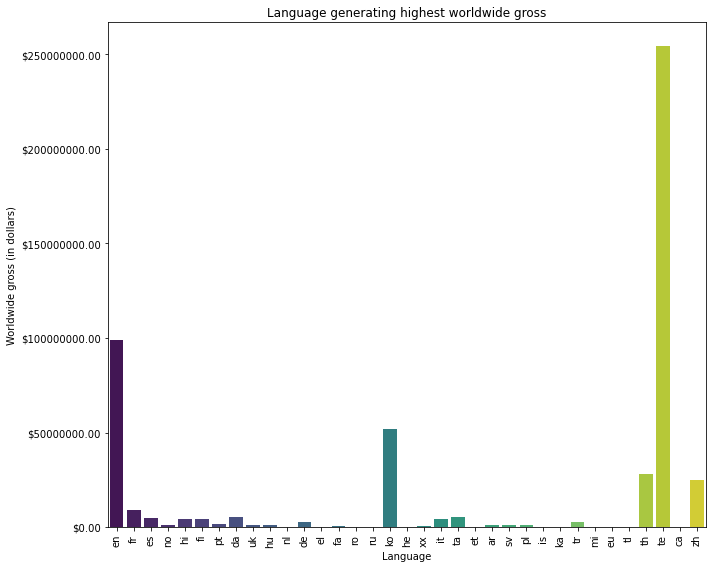

In [285]:
#Language generating maximum worldwide gross:
Language_preferred_fig, final_movie_dataset_ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.barplot(ax= final_movie_dataset_ax, x='original_language', y='worldwide_gross', data= final_movie_dataset,ci = None,palette='viridis')
final_movie_dataset_ax.set_xlabel('Language')
final_movie_dataset_ax.set_ylabel('Worldwide gross (in dollars)')
final_movie_dataset_ax.set_title('Language generating highest worldwide gross')
final_movie_dataset_ax.yaxis.set_major_formatter('${x:1.2f}')
final_movie_dataset_ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig('Images/Language_Worldwide.png', dpi=200)

plt.show()

### Conclusion:
Language generating maximum WorldWIde Gross is 'te' which stands for 'Telegu'.

### Language generating maximum Domestic Gross.

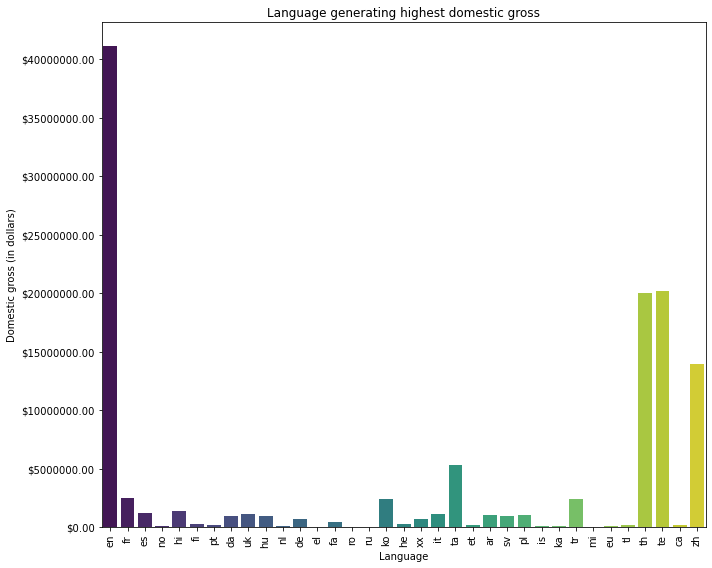

In [286]:
#Language generating highest domestic gross:
Language_preferred_fig, final_movie_dataset_ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.barplot(ax= final_movie_dataset_ax, x='original_language', y='domestic_gross', data= final_movie_dataset,ci = None,palette='viridis')
final_movie_dataset_ax.set_xlabel('Language')
final_movie_dataset_ax.set_ylabel('Domestic gross (in dollars)')
final_movie_dataset_ax.set_title('Language generating highest domestic gross')
final_movie_dataset_ax.yaxis.set_major_formatter('${x:1.2f}')
final_movie_dataset_ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig('Images/Domestic_gross_language.png', dpi=200)

plt.show()

### Conclusion:
Language generating maximum Domestic Gross is 'en' which stands for 'English'.

### Relationship between runtime of movies and their popularity:
Find how popularity of a movie and it's runtime are related.

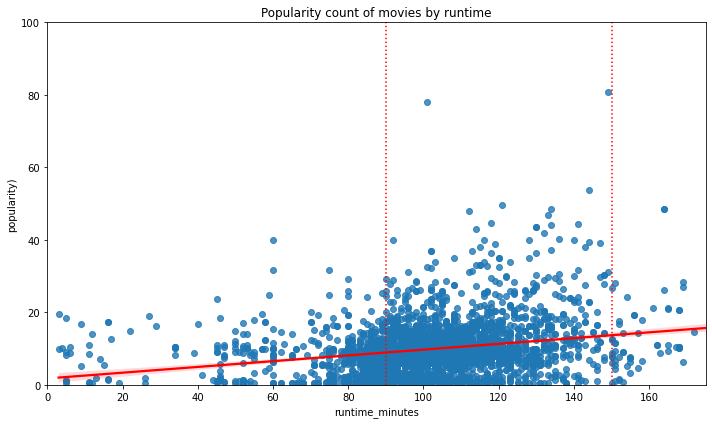

In [287]:
# Create a scatter plot to visualize the correlation between runtime & popularity.
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(ax=ax, x='runtime_minutes', y='popularity', data=final_movie_dataset, line_kws={'color': 'red'})
ax.set_xlabel('runtime_minutes')
ax.set_ylabel('popularity)')
ax.set_title('Popularity count of movies by runtime')
ax.set(xlim=(0,175))
ax.set(ylim=(0,100))
ax.axvline(90, color='red', ls=':')
ax.axvline(150, ls=':', color ='red')
plt.tight_layout()

plt.savefig('Images/Popularity count of movies by runtime.png', dpi=150)

plt.show()

### Conclusion:
There seems to be a close correlation between popularity of a movie and it's runtime.
100-120 seems to be an ideal range.

### Most profitable year for the movie industry.

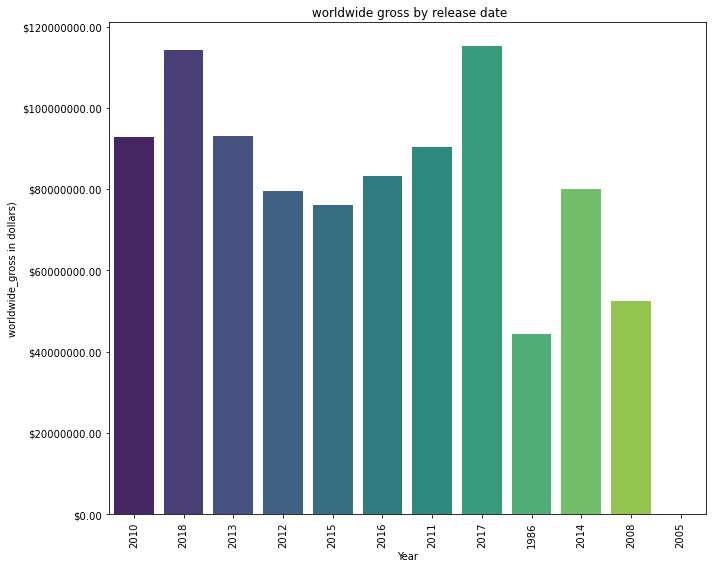

In [288]:
#create a bar plot to check which year was the most profitable one
Releasedate_fig, final_movie_dataset_ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.barplot(ax= final_movie_dataset_ax, x='year', y='worldwide_gross', data= final_movie_dataset,ci = None,palette='viridis')
final_movie_dataset_ax.set_xlabel('Year')
final_movie_dataset_ax.set_ylabel('worldwide_gross in dollars)')
final_movie_dataset_ax.set_title(' worldwide gross by release date')
final_movie_dataset_ax.yaxis.set_major_formatter('${x:1.2f}')
final_movie_dataset_ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig('Images/Profitable_Year.png', dpi=200)

plt.show()

### Conclusion:
The plot above concludes 2017 was the most profitable year for the business.

### Release Month that gathers the maximum Worldwide gross.


In [289]:
#release_month = final_movie_dataset.groupby('Month')[['worldwide_gross']].median().reset_index()
#release_month.head()

In [290]:
#Sorting out the months by values.
final_movie_dataset.sort_values(['worldwide_gross'], ascending = False)
release_month = final_movie_dataset.groupby(['Month'])['worldwide_gross'].mean()
release_month = release_month.reset_index()

release_month

,Month,worldwide_gross
0,Apr,5.212346e+07
1,Aug,6.775637e+07
2,Dec,1.050386e+08
3,Feb,9.262619e+07
4,Jan,5.958827e+07
5,Jul,1.255259e+08
6,Jun,1.244365e+08
7,Mar,6.601934e+07
8,May,1.083706e+08
9,Nov,1.415103e+08


**Updating the Month column by names**

In [255]:
#updating cell values to month names instead of numbers
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_nums = list(release_month['Month'])
months_dict = dict(zip(month_nums, month_names))
release_month['Month'] = release_month['Month'].map(months_dict)
release_month

,Month,worldwide_gross
0,Jan,5.958827e+07
1,Feb,9.262619e+07
2,Mar,6.601934e+07
3,Apr,5.212346e+07
4,May,1.083706e+08
5,Jun,1.244365e+08
6,Jul,1.255259e+08
7,Aug,6.775637e+07
8,Sep,7.792712e+07
9,Oct,4.537215e+07


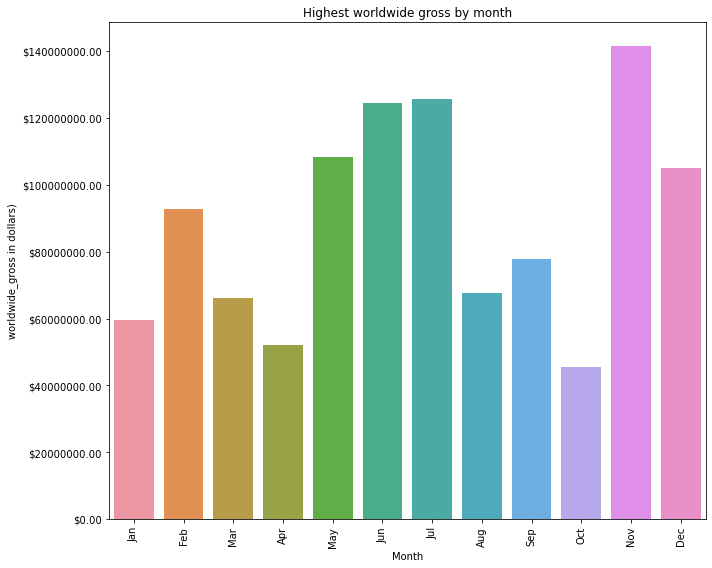

In [257]:
#Create a plot to understand which month gathers the maximum Gross earnings.
Release_month_fig, release_month_ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.barplot(ax= release_month_ax, x='Month', y='worldwide_gross', data= release_month,ci = None)
release_month_ax.set_xlabel('Month')
release_month_ax.set_ylabel('worldwide_gross in dollars)')
release_month_ax.set_title('Highest worldwide gross by month')
release_month_ax.yaxis.set_major_formatter('${x:1.2f}')
release_month_ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig('Images/releasemonth_gross.png', dpi=200)

plt.show()

### Conclusion:
November is the month that gathers the maximum Worldwide Gross.


## Dependency of Worldwide Gross on Average vote count.

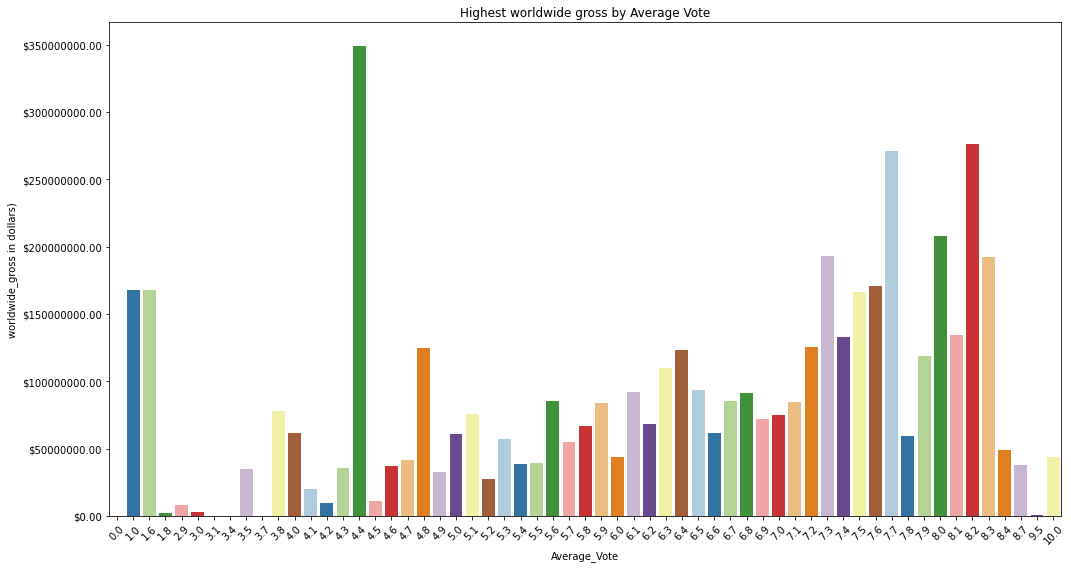

In [235]:
Release_month_fig, final_movie_dataset_ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.barplot(ax= final_movie_dataset_ax, x='vote_average', y='worldwide_gross', data= final_movie_dataset,ci = None,palette='Paired')
final_movie_dataset_ax.set_xlabel('Average_Vote')
final_movie_dataset_ax.set_ylabel('worldwide_gross in dollars)')
final_movie_dataset_ax.set_title('Highest worldwide gross by Average Vote')
final_movie_dataset_ax.yaxis.set_major_formatter('${x:1.2f}')
final_movie_dataset_ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.savefig('Images/Average_vote.png', dpi=200)

plt.show()

### Conclusion:
Average_Vote count 4.4 seems to gather maximum Worldwide Gross which concludes that a movie averagely rated also does well.

## Evaluation:
This analysis provides five recommendations for Microsoft's new movie studio in order to take calculated business decisions.
Knowing the demography of your target audience is crucial,here is the list thatcan be taken into consideration.
* **Make movies of the highest grossing genres.** The movies that could be categorized in the Sci Fi, family & animation,   tended to have higher box office earnings. Microsoft should focus on these genres the most.
* **Runtime should not be overlooked.** In general, movies that had longer runtimes also had higher box office     earnings.However, once movies surpassed a runtime threshold, box office performance was hampered. Microsoft should focus on making movies within that sweet spot between 100 and 120 minutes.
* **Average vote count for a movie is important**,the above analysis shows even with an average rating the movie can perform well in generating profit.
* **Release Month for a movie everything.** The data showed that the movies released in a particular month tend to have higher box office earnings. Microsoft should prioritize making quality, well reviewed movies that can score at least a 6 on IMDb's scale.
* **Knowing the language preferred by your audience domestically and worldwide.** This plays a pivotal role in deciding how much audience you can gather, which will help the movie make profit.




While the past years of data show that this should be a good recipe for success, one limitation is that we are currently in a global pandemic, which has negatively affected many facets of the global economy. The visualizations above displaying movie gross over time  clearly show a rise movie gross till year(2018). However, since movies take quite a bit of time to produce, the expectation is that the market will be trending in the right direction by the time a future movie would be released.



### Next Steps
Sourcing more data and conducting further analysis could provide Microsoft more insight on what type of movies to create.
Including more data, for example data on movie budgets, distribution location, release date, actors, directors, and more, could provide much more detailed insight into how to make profitable movies.